In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/covid-19-reinfection-and-health-dataset/covid_related_disease_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/covid-19-reinfection-and-health-dataset/covid_related_disease_data.csv')
df

,Patient_ID,Age,Gender,Region,Preexisting_Condition,Date_of_Infection,COVID_Strain,Symptoms,Severity,Hospitalized,...,Reinfection,Date_of_Reinfection,Vaccination_Status,Vaccine_Type,Doses_Received,Date_of_Last_Dose,Long_COVID_Symptoms,Occupation,Smoking_Status,BMI
0,1,69,Male,Hovedstaden,Obesity,2022-06-21,Delta,Mild,Moderate,Yes,...,No,NaN,Yes,NaN,1,2022-09-22,NaN,Healthcare,Never,27.7
1,2,38,Male,Sjælland,Asthma,2024-02-02,XBB.1.5,Mild,Moderate,No,...,No,NaN,No,NaN,0,NaN,NaN,Healthcare,Never,21.9
2,3,41,Female,Syddanmark,Hypertension,2023-05-28,Beta,Mild,High,Yes,...,No,NaN,Yes,Janssen,3,2024-05-14,NaN,Unemployed,Never,22.7
3,4,81,Female,Hovedstaden,Asthma,2023-08-13,Delta,Severe,High,No,...,Yes,2024-08-24,Yes,AstraZeneca,1,2024-10-31,NaN,Office Worker,Never,27.7
4,5,50,Female,Syddanmark,Cardiovascular,2023-03-10,Delta,Mild,High,No,...,No,NaN,Yes,NaN,2,2023-07-05,NaN,Student,Never,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,43,Male,Nordjylland,Hypertension,2022-10-19,XBB.1.5,Severe,Critical,No,...,No,NaN,Yes,NaN,1,2024-09-20,NaN,Driver,Never,22.0
2996,2997,36,Female,Syddanmark,Obesity,2022-12-16,Omicron,Moderate,Low,No,...,No,NaN,Yes,Pfizer,2,2023-10-05,NaN,Healthcare,Never,27.8
2997,2998,75,Female,Sjælland,Cardiovascular,2023-09-30,Beta,Severe,Moderate,No,...,No,NaN,Yes,Moderna,3,2023-05-13,NaN,Teacher,Former,20.9
2998,2999,45,Female,Hovedstaden,Asthma,2023-06-06,Delta,Severe,Moderate,No,...,No,NaN,Yes,AstraZeneca,1,2024-05-13,NaN,Student,Never,19.3


In [3]:
# Preview the first few rows
print(" Dataset loaded successfully.")
df.head()

 Dataset loaded successfully.


,Patient_ID,Age,Gender,Region,Preexisting_Condition,Date_of_Infection,COVID_Strain,Symptoms,Severity,Hospitalized,...,Reinfection,Date_of_Reinfection,Vaccination_Status,Vaccine_Type,Doses_Received,Date_of_Last_Dose,Long_COVID_Symptoms,Occupation,Smoking_Status,BMI
0,1,69,Male,Hovedstaden,Obesity,2022-06-21,Delta,Mild,Moderate,Yes,...,No,NaN,Yes,NaN,1,2022-09-22,NaN,Healthcare,Never,27.7
1,2,38,Male,Sjælland,Asthma,2024-02-02,XBB.1.5,Mild,Moderate,No,...,No,NaN,No,NaN,0,NaN,NaN,Healthcare,Never,21.9
2,3,41,Female,Syddanmark,Hypertension,2023-05-28,Beta,Mild,High,Yes,...,No,NaN,Yes,Janssen,3,2024-05-14,NaN,Unemployed,Never,22.7
3,4,81,Female,Hovedstaden,Asthma,2023-08-13,Delta,Severe,High,No,...,Yes,2024-08-24,Yes,AstraZeneca,1,2024-10-31,NaN,Office Worker,Never,27.7
4,5,50,Female,Syddanmark,Cardiovascular,2023-03-10,Delta,Mild,High,No,...,No,NaN,Yes,NaN,2,2023-07-05,NaN,Student,Never,11.9


In [4]:
# Show basic info and first few rows to understand the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               3000 non-null   int64  
 1   Age                      3000 non-null   int64  
 2   Gender                   3000 non-null   object 
 3   Region                   3000 non-null   object 
 4   Preexisting_Condition    2531 non-null   object 
 5   Date_of_Infection        3000 non-null   object 
 6   COVID_Strain             3000 non-null   object 
 7   Symptoms                 3000 non-null   object 
 8   Severity                 3000 non-null   object 
 9   Hospitalized             3000 non-null   object 
 10  Hospital_Admission_Date  876 non-null    object 
 11  Hospital_Discharge_Date  876 non-null    object 
 12  ICU_Admission            3000 non-null   object 
 13  Ventilator_Support       3000 non-null   object 
 14  Recovered               

In [5]:
df = df.drop(columns=[
    'Patient_ID', 'Date_of_Infection', 'Hospital_Admission_Date',
    'Hospital_Discharge_Date', 'Date_of_Recovery', 'Date_of_Reinfection',
    'Date_of_Last_Dose'
])

In [6]:
df.shape

(3000, 19)

In [7]:
df

,Age,Gender,Region,Preexisting_Condition,COVID_Strain,Symptoms,Severity,Hospitalized,ICU_Admission,Ventilator_Support,Recovered,Reinfection,Vaccination_Status,Vaccine_Type,Doses_Received,Long_COVID_Symptoms,Occupation,Smoking_Status,BMI
0,69,Male,Hovedstaden,Obesity,Delta,Mild,Moderate,Yes,No,No,Yes,No,Yes,NaN,1,NaN,Healthcare,Never,27.7
1,38,Male,Sjælland,Asthma,XBB.1.5,Mild,Moderate,No,No,No,No,No,No,NaN,0,NaN,Healthcare,Never,21.9
2,41,Female,Syddanmark,Hypertension,Beta,Mild,High,Yes,Yes,Yes,No,No,Yes,Janssen,3,NaN,Unemployed,Never,22.7
3,81,Female,Hovedstaden,Asthma,Delta,Severe,High,No,No,No,Yes,Yes,Yes,AstraZeneca,1,NaN,Office Worker,Never,27.7
4,50,Female,Syddanmark,Cardiovascular,Delta,Mild,High,No,No,No,No,No,Yes,NaN,2,NaN,Student,Never,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,43,Male,Nordjylland,Hypertension,XBB.1.5,Severe,Critical,No,No,No,No,No,Yes,NaN,1,NaN,Driver,Never,22.0
2996,36,Female,Syddanmark,Obesity,Omicron,Moderate,Low,No,No,No,No,No,Yes,Pfizer,2,NaN,Healthcare,Never,27.8
2997,75,Female,Sjælland,Cardiovascular,Beta,Severe,Moderate,No,No,No,No,No,Yes,Moderna,3,NaN,Teacher,Former,20.9
2998,45,Female,Hovedstaden,Asthma,Delta,Severe,Moderate,No,No,No,No,No,Yes,AstraZeneca,1,NaN,Student,Never,19.3


In [8]:
# Drop rows with missing target
df = df.dropna(subset=['Reinfection'])

In [9]:
df.shape

(3000, 19)

# Check Nulls

In [10]:
df.isna().sum()

Age                         0
Gender                      0
Region                      0
Preexisting_Condition     469
COVID_Strain                0
Symptoms                    0
Severity                    0
Hospitalized                0
ICU_Admission               0
Ventilator_Support          0
Recovered                   0
Reinfection                 0
Vaccination_Status          0
Vaccine_Type             1809
Doses_Received              0
Long_COVID_Symptoms      2780
Occupation                  0
Smoking_Status              0
BMI                         0
dtype: int64

In [11]:
# Calculate percentage of null values
(df.isna().sum() / len(df)) * 100

Age                       0.000000
Gender                    0.000000
Region                    0.000000
Preexisting_Condition    15.633333
COVID_Strain              0.000000
Symptoms                  0.000000
Severity                  0.000000
Hospitalized              0.000000
ICU_Admission             0.000000
Ventilator_Support        0.000000
Recovered                 0.000000
Reinfection               0.000000
Vaccination_Status        0.000000
Vaccine_Type             60.300000
Doses_Received            0.000000
Long_COVID_Symptoms      92.666667
Occupation                0.000000
Smoking_Status            0.000000
BMI                       0.000000
dtype: float64

In [12]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['Age', 'Doses_Received', 'BMI'], dtype='object')

In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Gender', 'Region', 'Preexisting_Condition', 'COVID_Strain', 'Symptoms',
       'Severity', 'Hospitalized', 'ICU_Admission', 'Ventilator_Support',
       'Recovered', 'Reinfection', 'Vaccination_Status', 'Vaccine_Type',
       'Long_COVID_Symptoms', 'Occupation', 'Smoking_Status'],
      dtype='object')

In [14]:
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [15]:
(df.isna().sum() / len(df)) * 100

Age                      0.0
Gender                   0.0
Region                   0.0
Preexisting_Condition    0.0
COVID_Strain             0.0
Symptoms                 0.0
Severity                 0.0
Hospitalized             0.0
ICU_Admission            0.0
Ventilator_Support       0.0
Recovered                0.0
Reinfection              0.0
Vaccination_Status       0.0
Vaccine_Type             0.0
Doses_Received           0.0
Long_COVID_Symptoms      0.0
Occupation               0.0
Smoking_Status           0.0
BMI                      0.0
dtype: float64

In [16]:
df.shape

(3000, 19)

# Plotting Data

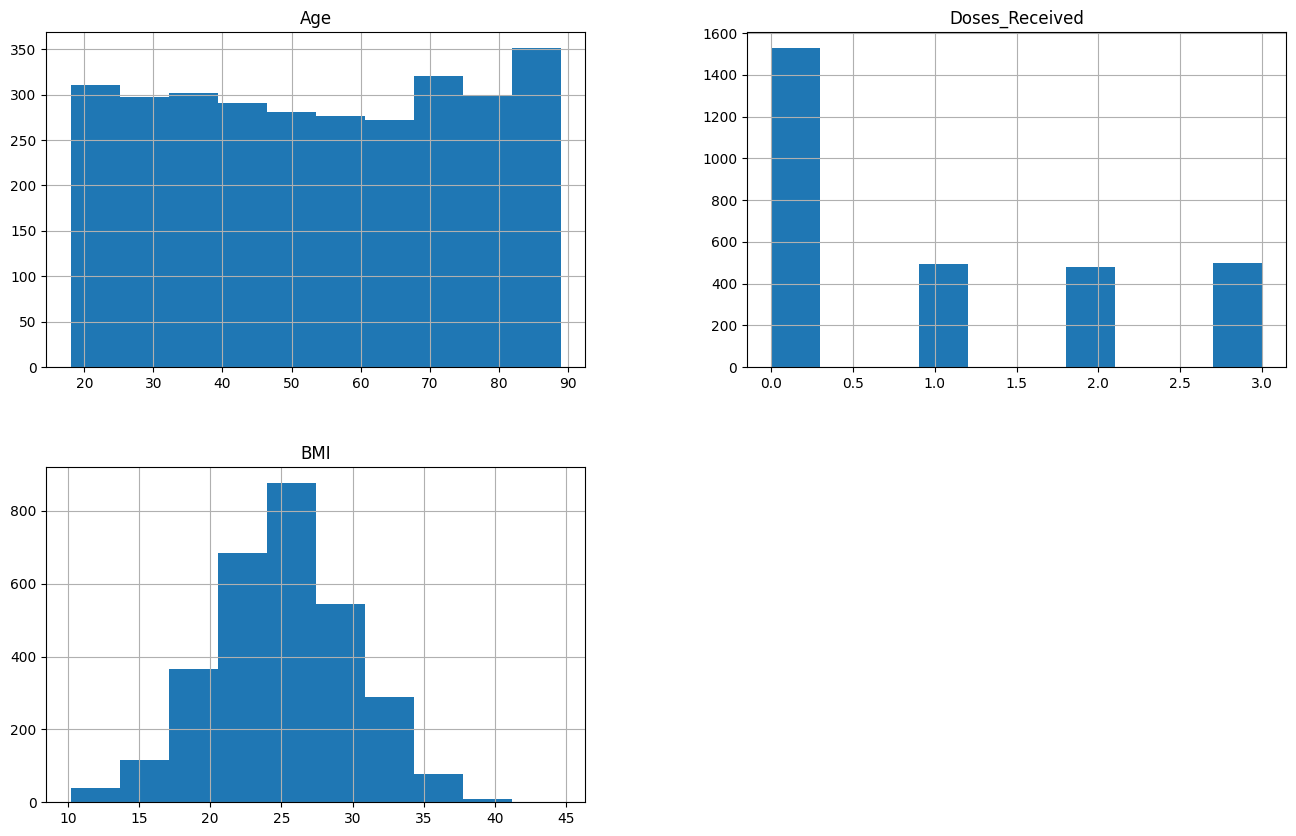

In [17]:
df[numerical_cols].hist(figsize=(16, 10))
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


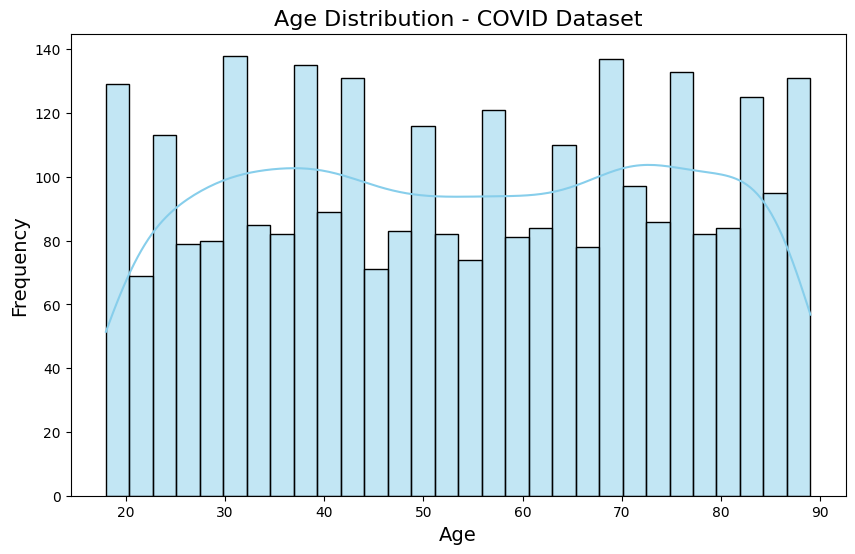

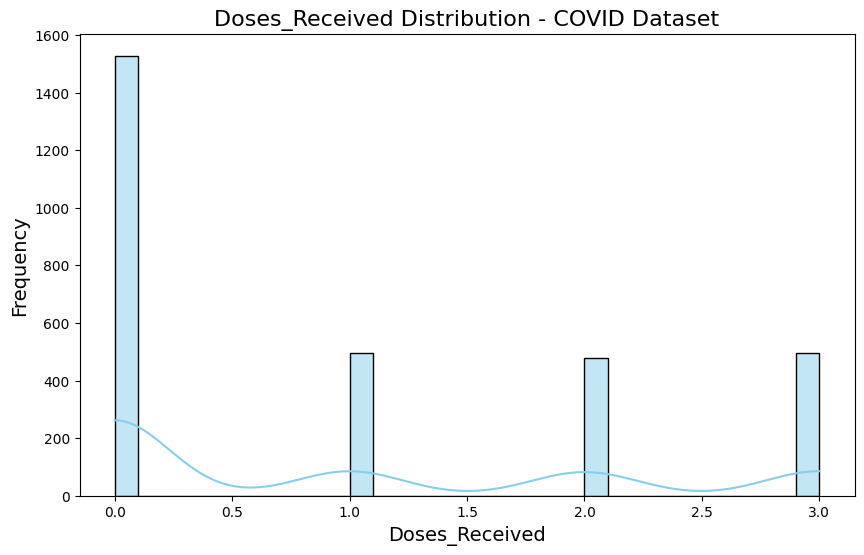

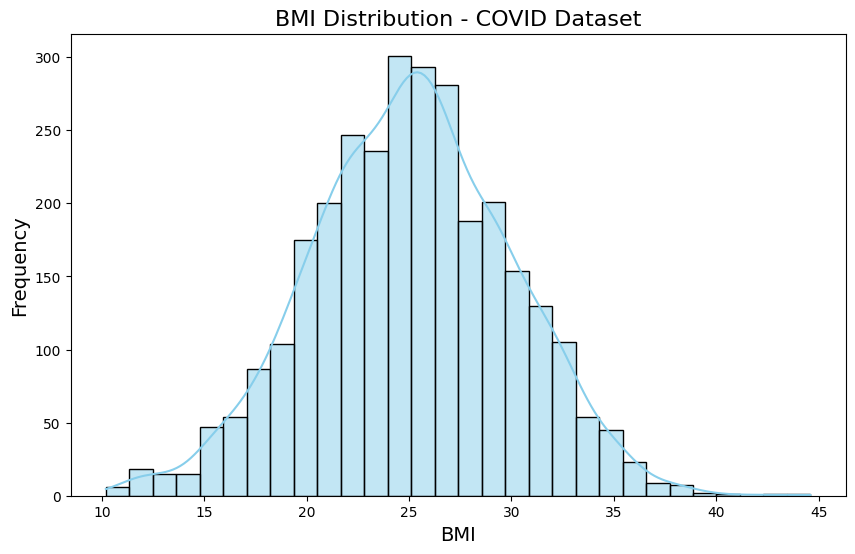

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df['Age'], bins=30, kde=True, color='skyblue')

plt.title('Age Distribution - COVID Dataset', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.figure(figsize=(10, 6))
sns.histplot(data=df['Doses_Received'], bins=30, kde=True, color='skyblue')

plt.title('Doses_Received Distribution - COVID Dataset', fontsize=16)
plt.xlabel('Doses_Received', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.figure(figsize=(10, 6))
sns.histplot(data=df['BMI'], bins=30, kde=True, color='skyblue')

plt.title('BMI Distribution - COVID Dataset', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()


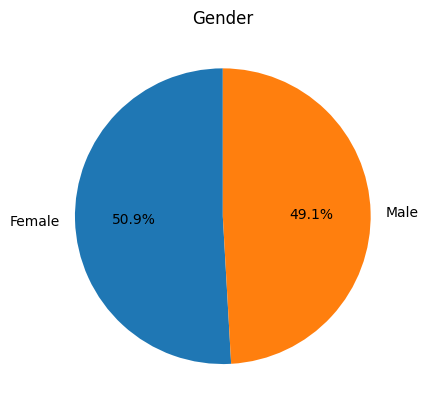

In [19]:
gender_counts = df['Gender'].value_counts()

gender_counts.plot.pie(
    labels=gender_counts.index, 
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Gender')
plt.ylabel('')
plt.show()

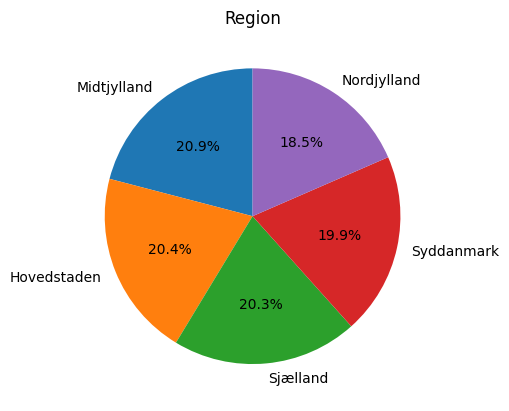

In [20]:
Region_counts = df['Region'].value_counts()

Region_counts.plot.pie(
    labels=Region_counts.index,  
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Region')
plt.ylabel('')
plt.show()

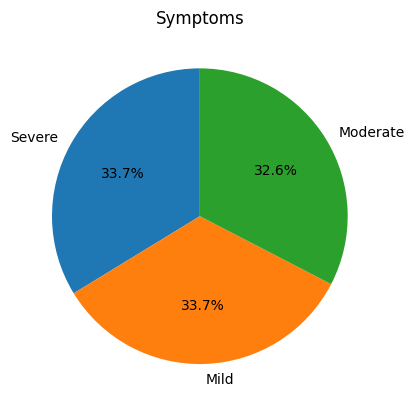

In [21]:
Symptoms_counts = df['Symptoms'].value_counts()

Symptoms_counts.plot.pie(
    labels=Symptoms_counts.index,  
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Symptoms')
plt.ylabel('')
plt.show()

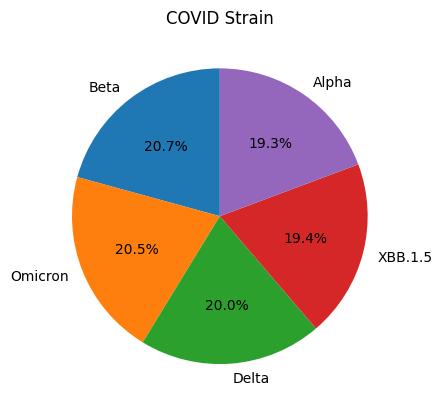

In [22]:
COVID_Strain_counts = df['COVID_Strain'].value_counts()

COVID_Strain_counts.plot.pie(
    labels=COVID_Strain_counts.index,  
    autopct='%1.1f%%',
    startangle=90
)
plt.title('COVID Strain')
plt.ylabel('')
plt.show()

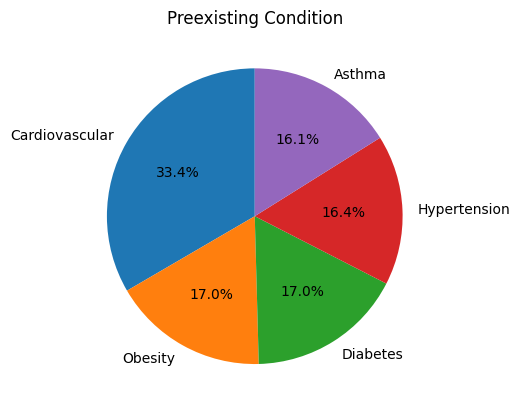

In [23]:
Preexisting_Condition_counts = df['Preexisting_Condition'].value_counts()

Preexisting_Condition_counts.plot.pie(
    labels=Preexisting_Condition_counts.index,  
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Preexisting Condition')
plt.ylabel('')
plt.show()

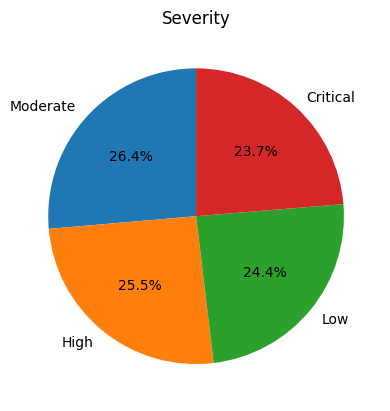

In [24]:
Severity_counts = df['Severity'].value_counts()

Severity_counts.plot.pie(
    labels=Severity_counts.index,  
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Severity')
plt.ylabel('')
plt.show()

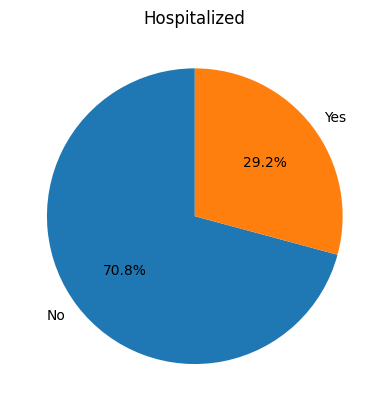

In [25]:
Hospitalized_counts = df['Hospitalized'].value_counts()

Hospitalized_counts.plot.pie(
    labels=Hospitalized_counts.index,  
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Hospitalized')
plt.ylabel('')
plt.show()

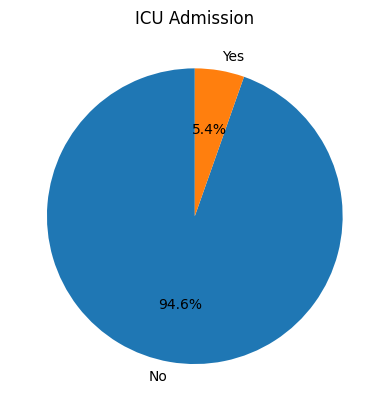

In [26]:
ICU_Admission_counts = df['ICU_Admission'].value_counts()

ICU_Admission_counts.plot.pie(
    labels=ICU_Admission_counts.index,  
    autopct='%1.1f%%',
    startangle=90
)
plt.title('ICU Admission')
plt.ylabel('')
plt.show()

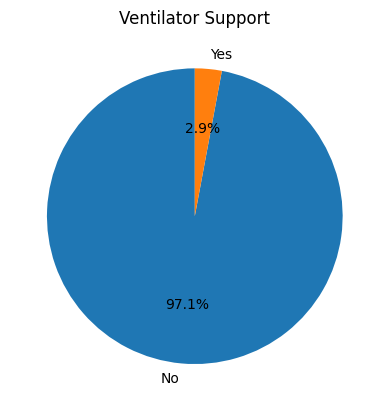

In [27]:
Ventilator_Support_counts = df['Ventilator_Support'].value_counts()

Ventilator_Support_counts.plot.pie(
    labels=Ventilator_Support_counts.index,  
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Ventilator Support')
plt.ylabel('')
plt.show()

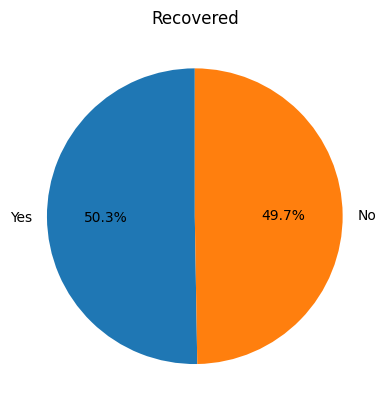

In [28]:
Recovered_counts = df['Recovered'].value_counts()

Recovered_counts.plot.pie(
    labels=Recovered_counts.index,  
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Recovered')
plt.ylabel('')
plt.show()

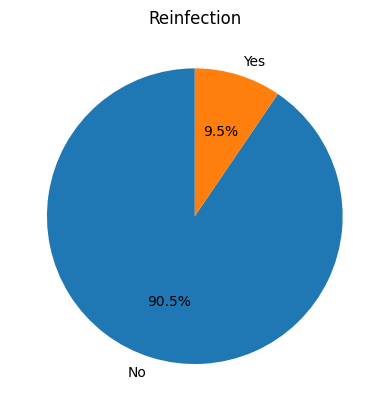

In [29]:
Reinfection_counts = df['Reinfection'].value_counts()

Reinfection_counts.plot.pie(
    labels=Reinfection_counts.index,  
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Reinfection')
plt.ylabel('')
plt.show()

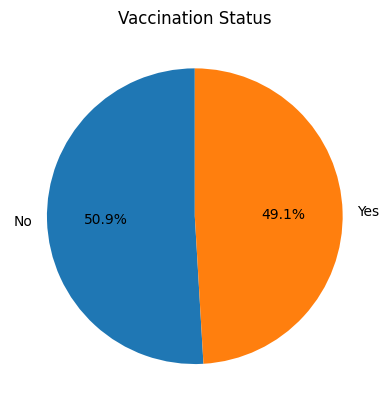

In [30]:
Vaccination_Status_counts = df['Vaccination_Status'].value_counts()

Vaccination_Status_counts.plot.pie(
    labels=Vaccination_Status_counts.index,  
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Vaccination Status')
plt.ylabel('')
plt.show()

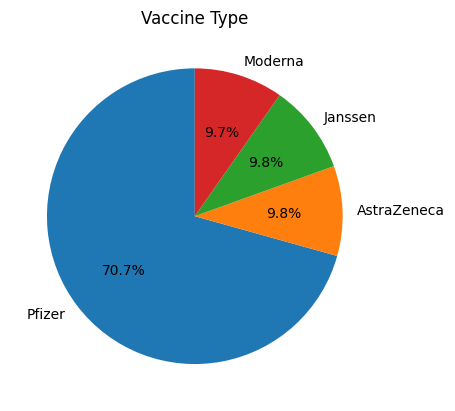

In [31]:
Vaccine_Type_counts = df['Vaccine_Type'].value_counts()

Vaccine_Type_counts.plot.pie(
    labels=Vaccine_Type_counts.index,  
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Vaccine Type')
plt.ylabel('')
plt.show()

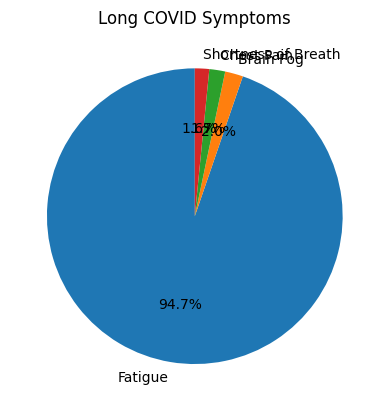

In [32]:
Long_COVID_Symptoms_counts = df['Long_COVID_Symptoms'].value_counts()

Long_COVID_Symptoms_counts.plot.pie(
    labels=Long_COVID_Symptoms_counts.index,  
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Long COVID Symptoms')
plt.ylabel('')
plt.show()


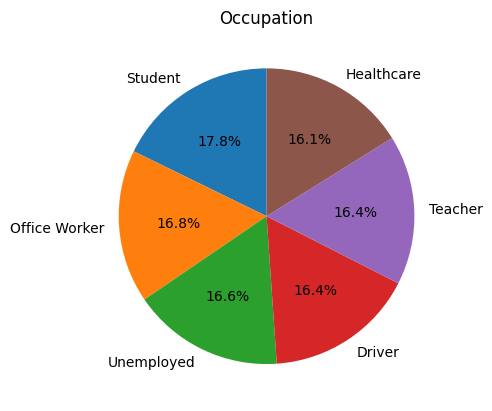

In [33]:
Occupation_counts = df['Occupation'].value_counts()

Occupation_counts.plot.pie(
    labels=Occupation_counts.index,  
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Occupation')
plt.ylabel('')
plt.show()


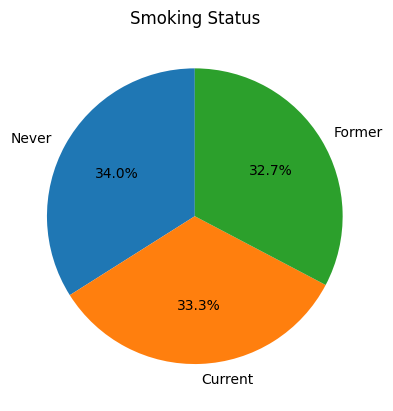

In [34]:
Smoking_Status_counts = df['Smoking_Status'].value_counts()

Smoking_Status_counts.plot.pie(
    labels=Smoking_Status_counts.index,  
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Smoking Status')
plt.ylabel('')
plt.show()


# Box Plot

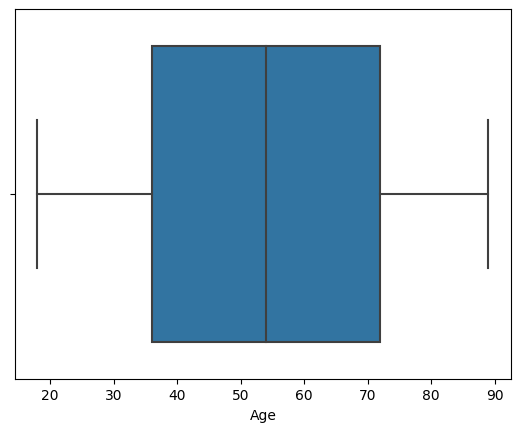

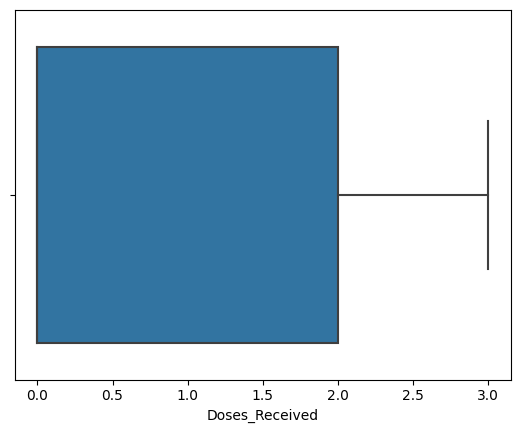

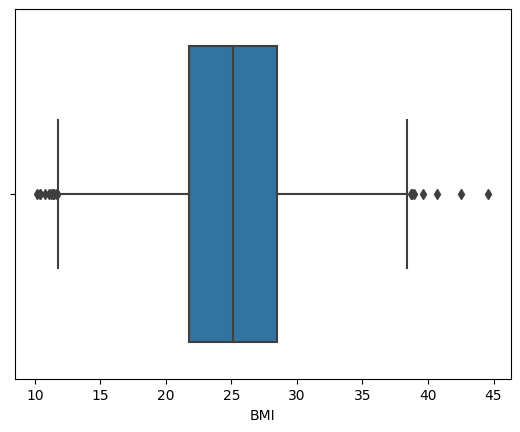

In [35]:
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.show()

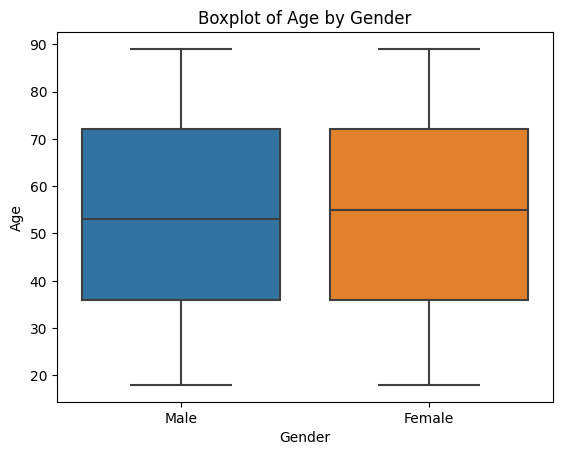

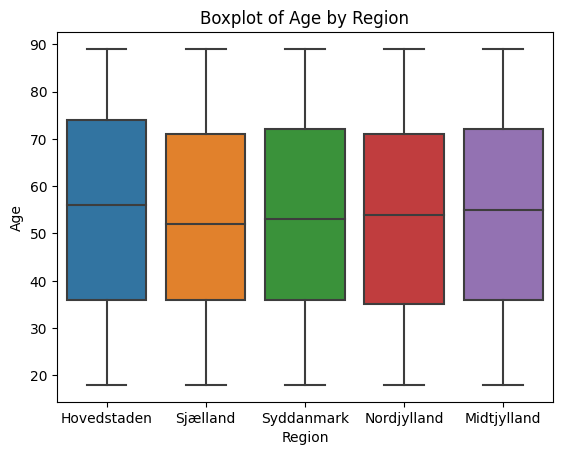

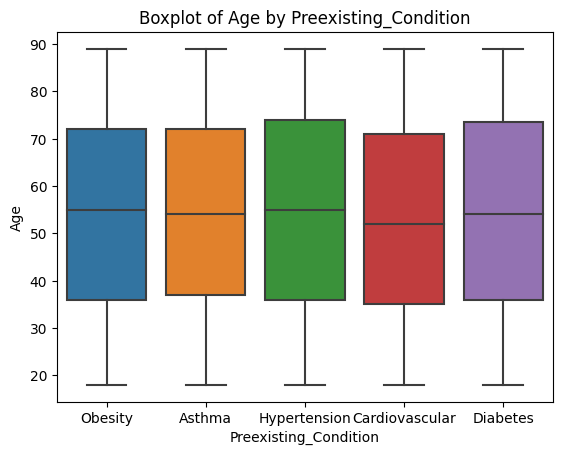

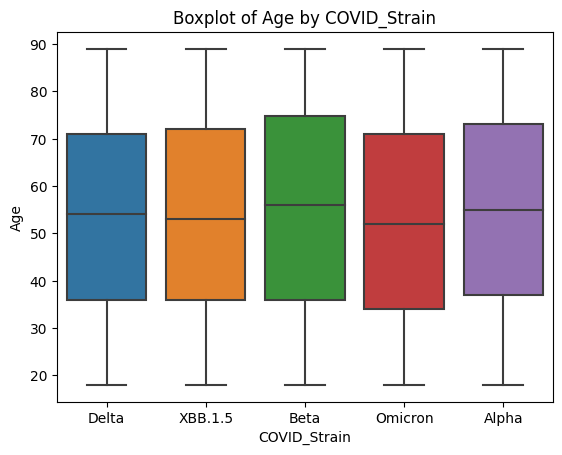

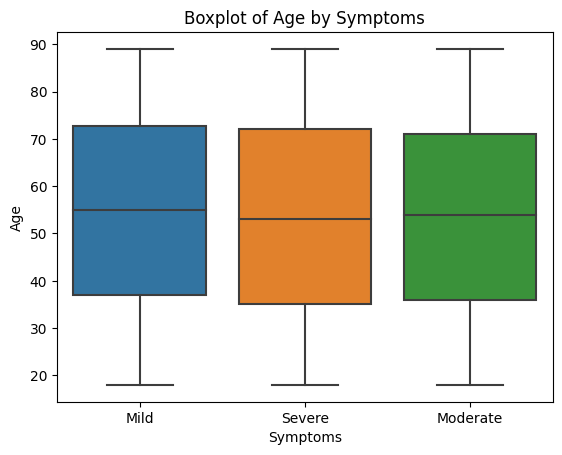

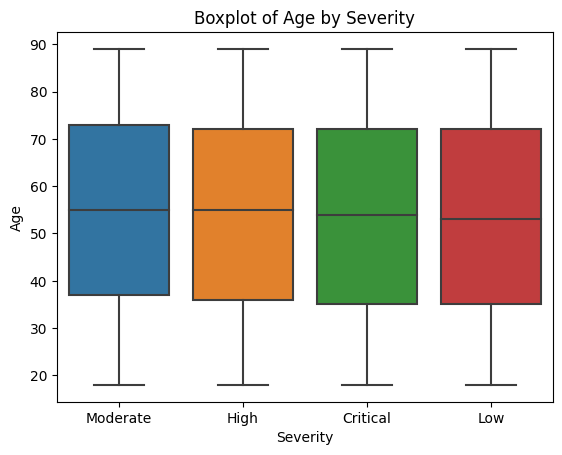

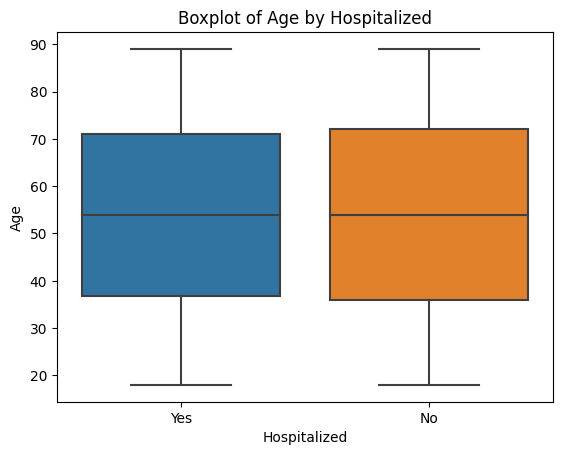

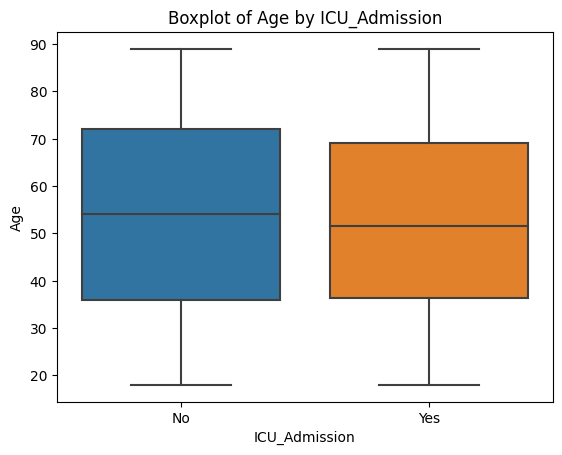

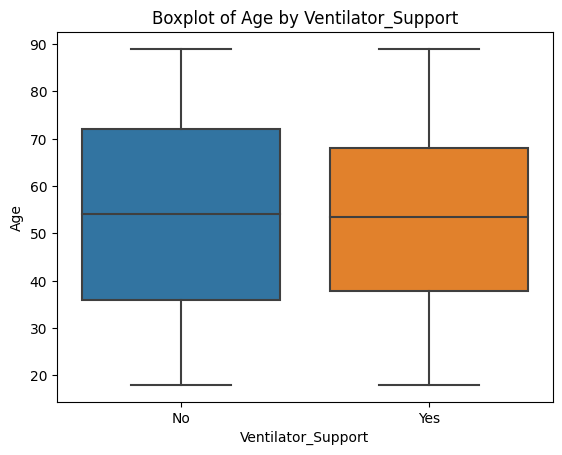

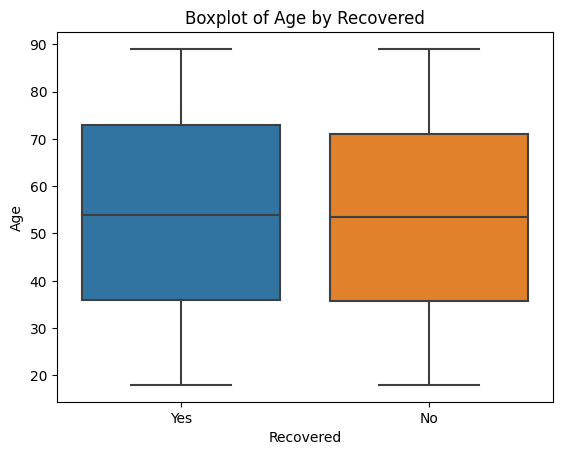

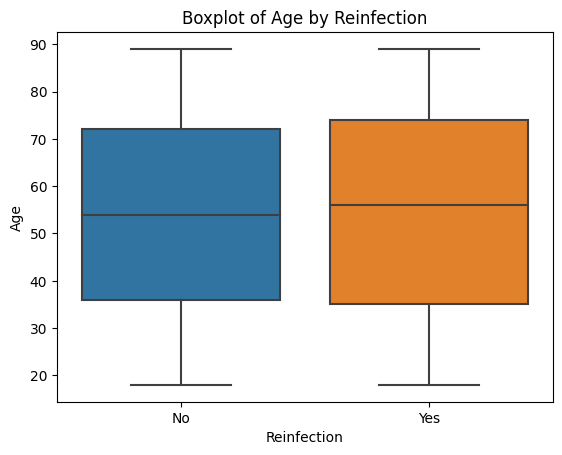

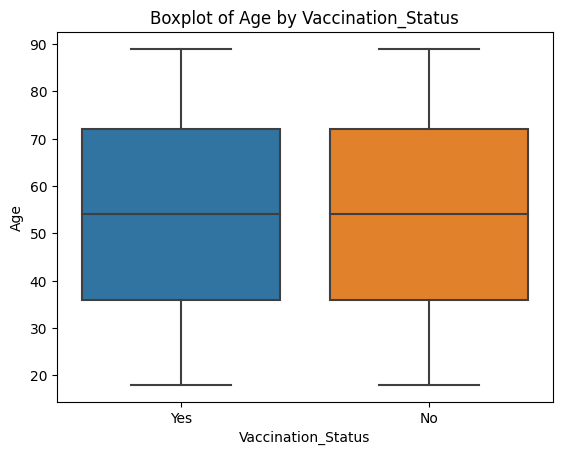

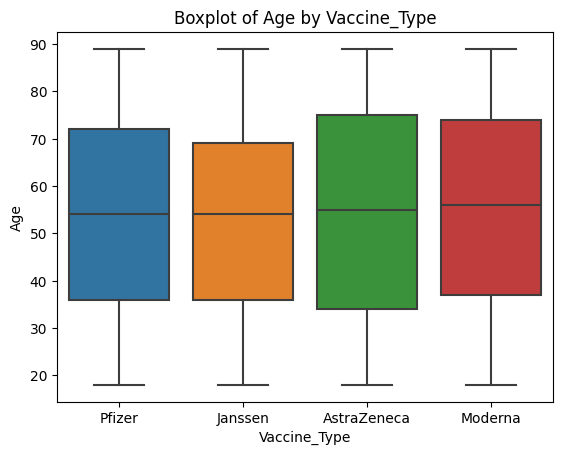

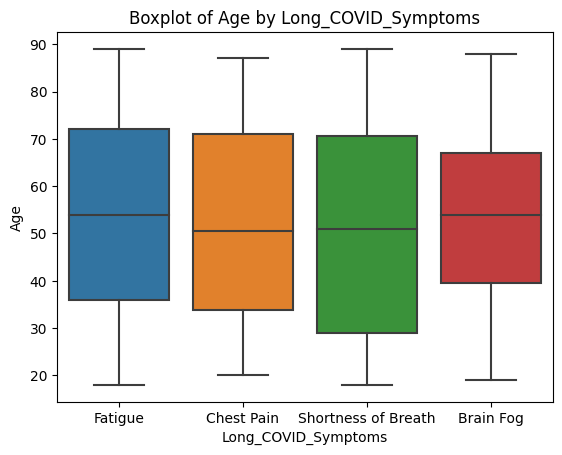

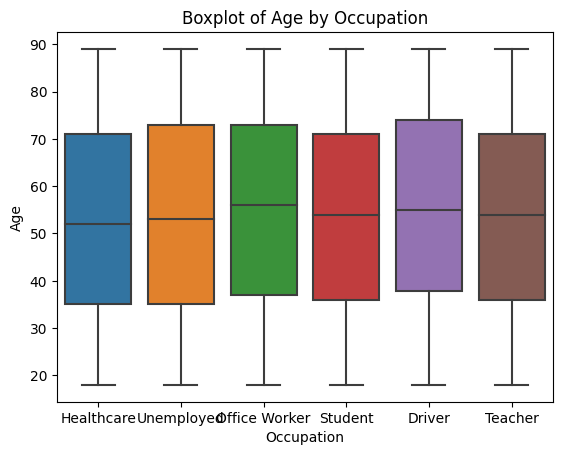

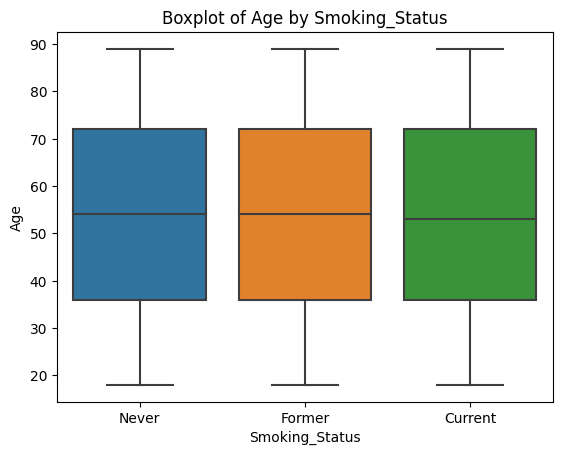

In [36]:
for col in categorical_cols:
    sns.boxplot(x=df[col], y=df['Age']) 
    plt.title(f'Boxplot of Age by {col}')
    plt.show()

In [37]:
cols_to_encode = [
    'Gender', 'Region', 'Preexisting_Condition', 'COVID_Strain', 'Symptoms',
    'Severity', 'Hospitalized', 'ICU_Admission', 'Ventilator_Support',
    'Recovered', 'Reinfection', 'Vaccination_Status', 'Vaccine_Type',
    'Long_COVID_Symptoms', 'Occupation', 'Smoking_Status'
]

for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [38]:
df

,Age,Gender,Region,Preexisting_Condition,COVID_Strain,Symptoms,Severity,Hospitalized,ICU_Admission,Ventilator_Support,Recovered,Reinfection,Vaccination_Status,Vaccine_Type,Doses_Received,Long_COVID_Symptoms,Occupation,Smoking_Status,BMI
0,69,1,0,4,2,0,3,1,0,0,1,0,1,3,1,2,1,2,27.7
1,38,1,3,0,4,0,3,0,0,0,0,0,0,3,0,2,1,2,21.9
2,41,0,4,3,1,0,1,1,1,1,0,0,1,1,3,2,5,2,22.7
3,81,0,0,0,2,2,1,0,0,0,1,1,1,0,1,2,2,2,27.7
4,50,0,4,1,2,0,1,0,0,0,0,0,1,3,2,2,3,2,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,43,1,2,3,4,2,0,0,0,0,0,0,1,3,1,2,0,2,22.0
2996,36,0,4,4,3,1,2,0,0,0,0,0,1,3,2,2,1,2,27.8
2997,75,0,3,1,1,2,3,0,0,0,0,0,1,2,3,2,4,1,20.9
2998,45,0,0,0,2,2,3,0,0,0,0,0,1,0,1,2,3,2,19.3


# Heatmap

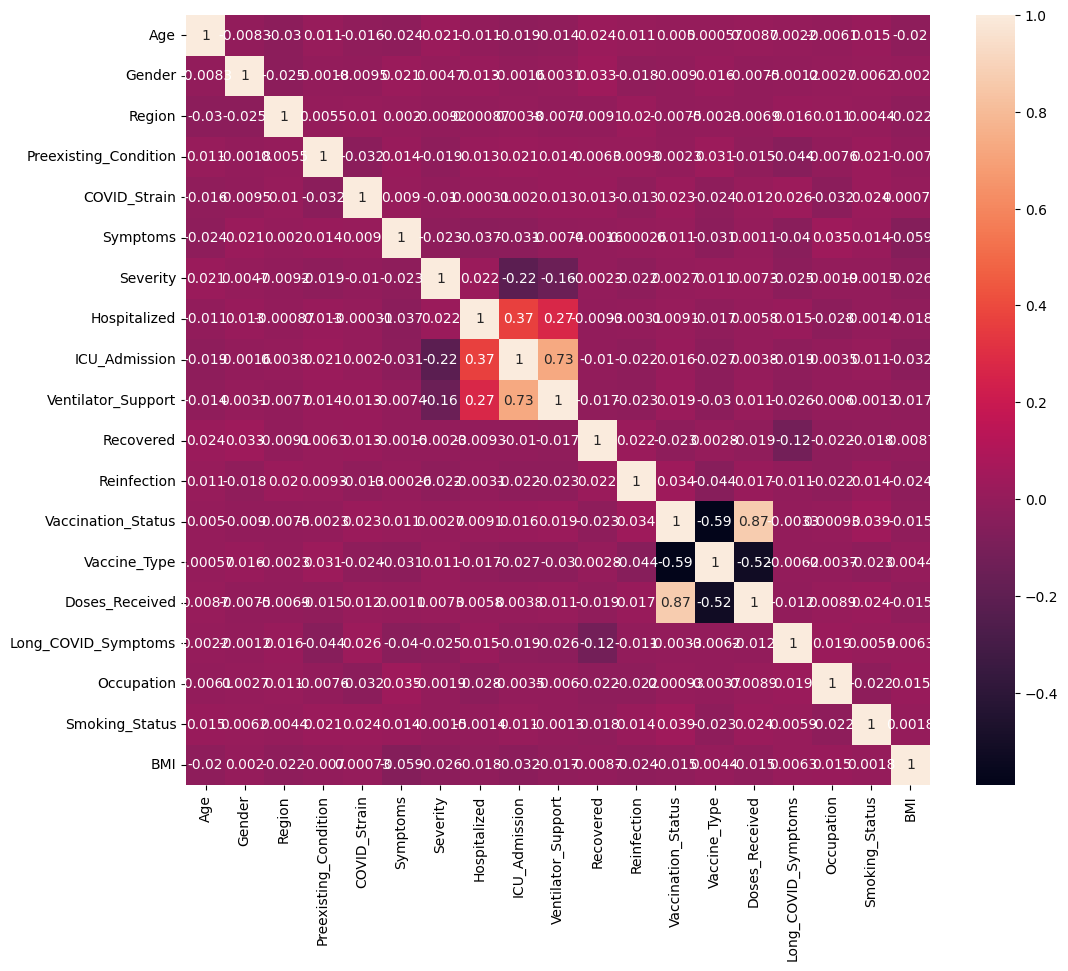

In [39]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Z-Standralization

In [40]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df.head())

        Age  Gender  Region  Preexisting_Condition  COVID_Strain  Symptoms  \
0  0.721438       1       0                      4             2         0   
1 -0.763988       1       3                      0             4         0   
2 -0.620237       0       4                      3             1         0   
3  1.296441       0       0                      0             2         2   
4 -0.188984       0       4                      1             2         0   

   Severity  Hospitalized  ICU_Admission  Ventilator_Support  Recovered  \
0         3             1              0                   0          1   
1         3             0              0                   0          0   
2         1             1              1                   1          0   
3         1             0              0                   0          1   
4         1             0              0                   0          0   

   Reinfection  Vaccination_Status  Vaccine_Type  Doses_Received  \
0           

In [41]:
print(df[numerical_cols].mean())
print(df[numerical_cols].std())

Age              -1.255292e-16
Doses_Received    4.855375e-17
BMI               2.119786e-16
dtype: float64
Age               1.000167
Doses_Received    1.000167
BMI               1.000167
dtype: float64


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,-1.255292e-16,1.000167,-1.722327,-0.859822,0.002683,0.865189,1.679777
Gender,3000.0,4.910000e-01,0.500002,0.000000,0.000000,0.000000,1.000000,1.000000
Region,3000.0,1.983667e+00,1.422934,0.000000,1.000000,2.000000,3.000000,4.000000
Preexisting_Condition,3000.0,1.849000e+00,1.342187,0.000000,1.000000,2.000000,3.000000,4.000000
COVID_Strain,3000.0,2.000667e+00,1.400947,0.000000,1.000000,2.000000,3.000000,4.000000
Symptoms,3000.0,1.000667e+00,0.821112,0.000000,0.000000,1.000000,2.000000,2.000000
Severity,3000.0,1.534333e+00,1.118290,0.000000,1.000000,2.000000,3.000000,3.000000
Hospitalized,3000.0,2.920000e-01,0.454758,0.000000,0.000000,0.000000,1.000000,1.000000
ICU_Admission,3000.0,5.400000e-02,0.226055,0.000000,0.000000,0.000000,0.000000,1.000000
Ventilator_Support,3000.0,2.933333e-02,0.168767,0.000000,0.000000,0.000000,0.000000,1.000000


# Splitting Data

In [43]:
x=df.drop(columns=['Reinfection'])
y=df['Reinfection']

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [45]:
#  LogisticRegression

lr=LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr=lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("LogisticRegression  Accuracy:", accuracy_lr*100)


LogisticRegression  Accuracy: 90.83333333333333


In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_pred_lr, y_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       600
           1       0.00      0.00      0.00         0

    accuracy                           0.91       600
   macro avg       0.50      0.45      0.48       600
weighted avg       1.00      0.91      0.95       600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


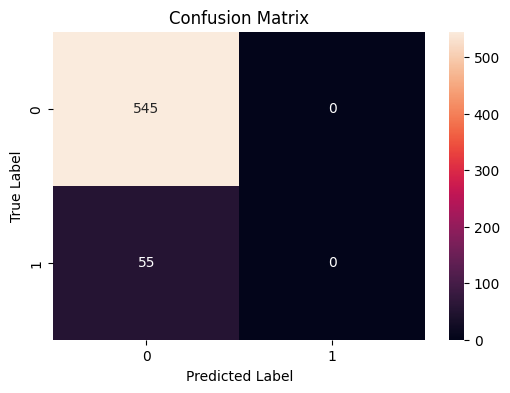

In [47]:
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

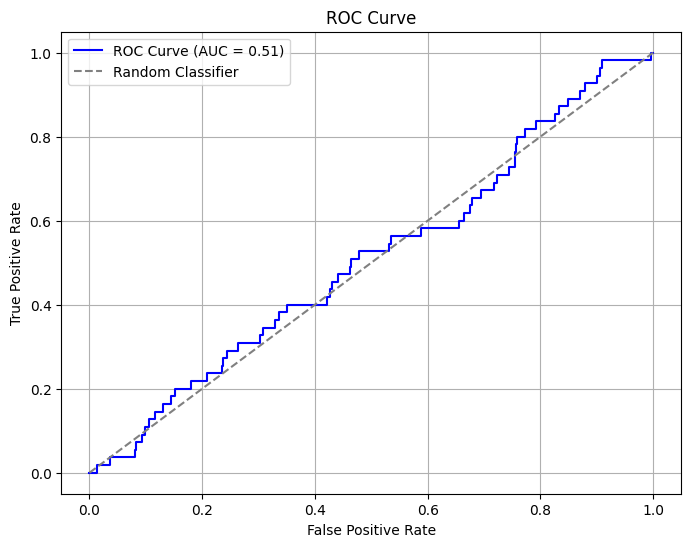

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = lr.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [50]:
svm_y_pred = svm.predict(x_test)

In [51]:
print(f"Accuracy: {accuracy_score(svm_y_pred, y_test) * 100:.2f}%")

Accuracy: 90.83%


In [52]:
print(classification_report(svm_y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       600
           1       0.00      0.00      0.00         0

    accuracy                           0.91       600
   macro avg       0.50      0.45      0.48       600
weighted avg       1.00      0.91      0.95       600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


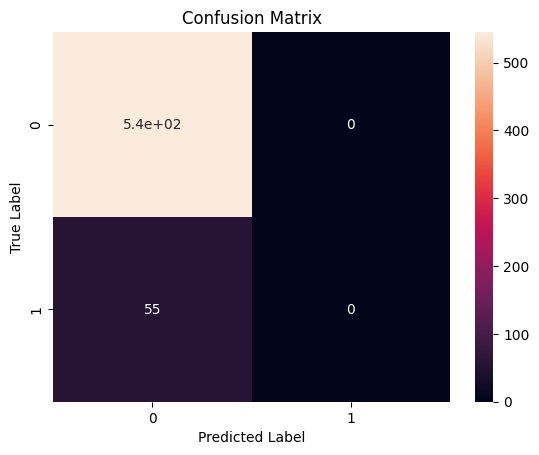

In [53]:
cm_svm = confusion_matrix(svm_y_pred, y_test)

sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted', zero_division=0)
recall_lr = recall_score(y_test, y_pred_lr, average='weighted', zero_division=0)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print("Accuracy:", accuracy_lr * 100)
print("Precision:", precision_lr * 100)
print("Recall:", recall_lr * 100)
print("F1 Score:", f1_lr * 100)

Accuracy: 90.83333333333333
Precision: 82.50694444444446
Recall: 90.83333333333333
F1 Score: 86.47016011644834
